### Task
В данном задании необходимо обучить агента побеждать в игре Ant при помощи DDPG, TD3 или SAC. Для решения задачи можно трансформировать состояние и награду среды.<br>
К заданию также нужно приложить код обучения агента (не забудьте зафиксировать seed!), готовый (уже обученный) агент должен быть описан в классе Agent в файле 'agent.py'.<br>
Оценка выставляется от 1 до 10 и линейно зависит за набранный агентом счет в среднем за 50 эпизодов. Максимальный счет - 2200, минимальный счет - 1000.<br>
Обратите внимание: для выполнения данной работы вам потребуется установить библиотеку PyBullet.

<a href='https://wandb.ai/cleanrl/cleanrl.benchmark/runs/2u8fgaw9/files/code/cleanrl/td3_continuous_action.py'>Статья</a>

In [1]:
from gym import make
import gym
import numpy as np
import torch
from torch import nn
from torch.distributions import Normal
from torch.nn import functional as F
from torch.optim import Adam
import base64, io
import matplotlib.pyplot as plt
import pybullet_envs
import random

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display 
import glob

import warnings
warnings.filterwarnings('ignore')

/Users/annasmelova/anaconda3/envs/made_rl/lib/python3.9/site-packages/gym/envs/registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(


In [2]:
SEED = 1
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [3]:
ENV_NAME = "AntBulletEnv-v0"

In [4]:
import train as t
import agent as a

In [5]:
%%time
rewards, steps = t.main()

pybullet build time: Nov 11 2022 15:18:46


Step: 1000, Reward mean: 11.007009535712713, Reward std: 2.0105365166887483 | Episodes: 13, Steps: 1000
Step: 2000, Reward mean: 14.886607694554552, Reward std: 4.978319235896237 | Episodes: 14, Steps: 2000
Step: 3000, Reward mean: 311.64283034136207, Reward std: 37.70625187944562 | Episodes: 18, Steps: 3000
Step: 4000, Reward mean: 390.2100924334601, Reward std: 37.04755223938262 | Episodes: 19, Steps: 4000
Step: 5000, Reward mean: 460.04409896762024, Reward std: 67.12616276782248 | Episodes: 20, Steps: 5000
Step: 6000, Reward mean: 474.0940691886095, Reward std: 8.132492041427728 | Episodes: 21, Steps: 6000
Step: 7000, Reward mean: 188.41748298944444, Reward std: 4.216698280730423 | Episodes: 22, Steps: 7000
Step: 8000, Reward mean: 673.4044431738296, Reward std: 7.290885356675724 | Episodes: 23, Steps: 8000
Step: 9000, Reward mean: 664.8617525235198, Reward std: 6.244434274197583 | Episodes: 25, Steps: 9000
Step: 10000, Reward mean: 576.6591842034923, Reward std: 220.6417080078812 |

Step: 80000, Reward mean: 752.2685519091631, Reward std: 28.079910443966725 | Episodes: 96, Steps: 80000
Step: 81000, Reward mean: 714.8328486434436, Reward std: 161.33748823597276 | Episodes: 97, Steps: 81000
Step: 82000, Reward mean: 766.3046218202733, Reward std: 92.91392659481578 | Episodes: 98, Steps: 82000
Step: 83000, Reward mean: 677.6912130247089, Reward std: 91.8768957577005 | Episodes: 99, Steps: 83000
Step: 84000, Reward mean: 779.1558862287894, Reward std: 156.26577618210078 | Episodes: 100, Steps: 84000
Step: 85000, Reward mean: 802.5125899075883, Reward std: 89.12213720400162 | Episodes: 101, Steps: 85000
Step: 86000, Reward mean: 725.3367625698672, Reward std: 71.40935618834547 | Episodes: 102, Steps: 86000
Step: 87000, Reward mean: 763.3059442730106, Reward std: 92.36158162581272 | Episodes: 103, Steps: 87000
Step: 88000, Reward mean: 746.3199869551854, Reward std: 80.94687654771235 | Episodes: 104, Steps: 88000
Step: 89000, Reward mean: 797.4268985802853, Reward std: 

Step: 157000, Reward mean: 934.6316261720722, Reward std: 27.08834647476065 | Episodes: 173, Steps: 157000
Step: 158000, Reward mean: 918.9320744279245, Reward std: 40.83731198637942 | Episodes: 174, Steps: 158000
Step: 159000, Reward mean: 959.7467940749757, Reward std: 65.73613775563891 | Episodes: 175, Steps: 159000
Step: 160000, Reward mean: 891.0262925013005, Reward std: 29.57234669658863 | Episodes: 176, Steps: 160000
Step: 161000, Reward mean: 891.9198151514483, Reward std: 81.23414603995955 | Episodes: 177, Steps: 161000
Step: 162000, Reward mean: 954.3641676796749, Reward std: 91.37067968709239 | Episodes: 178, Steps: 162000
Step: 163000, Reward mean: 953.1372211421274, Reward std: 71.97829008223336 | Episodes: 179, Steps: 163000
Step: 164000, Reward mean: 865.7202487045112, Reward std: 82.7211760205145 | Episodes: 180, Steps: 164000
Step: 165000, Reward mean: 896.8587738753137, Reward std: 51.62977917481688 | Episodes: 181, Steps: 165000
Step: 166000, Reward mean: 913.3262366

Step: 234000, Reward mean: 1805.5848871422404, Reward std: 63.342774670236004 | Episodes: 250, Steps: 234000
Step: 235000, Reward mean: 1848.8420340374232, Reward std: 44.25144882094444 | Episodes: 251, Steps: 235000
Step: 236000, Reward mean: 1860.473687569221, Reward std: 87.3851082421913 | Episodes: 252, Steps: 236000
Step: 237000, Reward mean: 1846.7824843341248, Reward std: 31.224632566194934 | Episodes: 253, Steps: 237000
Step: 238000, Reward mean: 1716.811113321813, Reward std: 78.74459305498051 | Episodes: 254, Steps: 238000
Step: 239000, Reward mean: 1848.5669415401367, Reward std: 41.44081676448581 | Episodes: 255, Steps: 239000
Step: 240000, Reward mean: 1752.730207519445, Reward std: 92.01564801285089 | Episodes: 256, Steps: 240000
Step: 241000, Reward mean: 1800.7108754187016, Reward std: 66.19837697315727 | Episodes: 257, Steps: 241000
Step: 242000, Reward mean: 1742.7335481695336, Reward std: 26.362717398339743 | Episodes: 258, Steps: 242000
Step: 243000, Reward mean: 19

Step: 310000, Reward mean: 2316.471319568834, Reward std: 22.057598150310703 | Episodes: 326, Steps: 310000
Step: 311000, Reward mean: 2188.3640219654562, Reward std: 25.719478804126172 | Episodes: 327, Steps: 311000
Step: 312000, Reward mean: 2289.3238300366756, Reward std: 13.838078471650485 | Episodes: 328, Steps: 312000
Step: 313000, Reward mean: 2173.112541219819, Reward std: 33.63042264790071 | Episodes: 329, Steps: 313000
Step: 314000, Reward mean: 2183.787776739534, Reward std: 22.851398748664867 | Episodes: 330, Steps: 314000
Step: 315000, Reward mean: 2075.101945896891, Reward std: 72.14525816933397 | Episodes: 331, Steps: 315000
Step: 316000, Reward mean: 2188.2155928018146, Reward std: 23.290818218451882 | Episodes: 332, Steps: 316000
Step: 317000, Reward mean: 2281.504028673034, Reward std: 14.546140271051092 | Episodes: 333, Steps: 317000
Step: 318000, Reward mean: 2333.0422008357273, Reward std: 24.17957847933878 | Episodes: 334, Steps: 318000
Step: 319000, Reward mean: 

Step: 386000, Reward mean: 2332.0844468380296, Reward std: 52.35101827738713 | Episodes: 402, Steps: 386000
Step: 387000, Reward mean: 2415.2649446359605, Reward std: 28.95164938168448 | Episodes: 403, Steps: 387000
Step: 388000, Reward mean: 2444.8518769375833, Reward std: 23.709226413430763 | Episodes: 404, Steps: 388000
Step: 389000, Reward mean: 2296.770983743813, Reward std: 49.8949292629917 | Episodes: 405, Steps: 389000
Step: 390000, Reward mean: 2294.8373790100877, Reward std: 14.505055025408472 | Episodes: 406, Steps: 390000
Step: 391000, Reward mean: 2346.354747602579, Reward std: 27.87370007759272 | Episodes: 407, Steps: 391000
Step: 392000, Reward mean: 2419.3979633462613, Reward std: 13.09942660990123 | Episodes: 408, Steps: 392000
Step: 393000, Reward mean: 2382.3486474586916, Reward std: 31.70273145519272 | Episodes: 409, Steps: 393000
Step: 394000, Reward mean: 2360.3045826648026, Reward std: 31.89014249607493 | Episodes: 410, Steps: 394000
Step: 395000, Reward mean: 24

Step: 462000, Reward mean: 2450.6534252402867, Reward std: 35.16553228364634 | Episodes: 478, Steps: 462000
Step: 463000, Reward mean: 2569.049460369253, Reward std: 29.94129213194604 | Episodes: 479, Steps: 463000
Step: 464000, Reward mean: 2506.5011022917824, Reward std: 13.87691752270393 | Episodes: 480, Steps: 464000
Step: 465000, Reward mean: 2386.8189012857165, Reward std: 55.80277059856421 | Episodes: 481, Steps: 465000
Step: 466000, Reward mean: 2542.9082611322333, Reward std: 24.492968033553502 | Episodes: 482, Steps: 466000
Step: 467000, Reward mean: 2561.9691896446616, Reward std: 41.164754417228146 | Episodes: 483, Steps: 467000
Step: 468000, Reward mean: 2513.1240233231165, Reward std: 40.33942113940744 | Episodes: 484, Steps: 468000
Step: 469000, Reward mean: 2549.412172521462, Reward std: 15.912696692353359 | Episodes: 485, Steps: 469000
Step: 470000, Reward mean: 2424.004877772737, Reward std: 25.597354524078707 | Episodes: 486, Steps: 470000
Step: 471000, Reward mean: 

Step: 538000, Reward mean: 2669.073617817413, Reward std: 27.054843803470025 | Episodes: 554, Steps: 538000
Step: 539000, Reward mean: 2703.5554197567863, Reward std: 25.904174106729982 | Episodes: 555, Steps: 539000
Step: 540000, Reward mean: 2707.1981919874715, Reward std: 49.79480275921933 | Episodes: 556, Steps: 540000
Step: 541000, Reward mean: 2650.7829286986503, Reward std: 19.336518551162065 | Episodes: 557, Steps: 541000
Step: 542000, Reward mean: 2663.393290133137, Reward std: 19.79024941478683 | Episodes: 558, Steps: 542000
Step: 543000, Reward mean: 2653.9446774996904, Reward std: 22.156454242819997 | Episodes: 559, Steps: 543000
Step: 544000, Reward mean: 2569.156616886986, Reward std: 34.34561042096042 | Episodes: 560, Steps: 544000
Step: 545000, Reward mean: 2537.582017580615, Reward std: 62.500682170864174 | Episodes: 561, Steps: 545000
Step: 546000, Reward mean: 2717.1606682919914, Reward std: 23.24037598996883 | Episodes: 562, Steps: 546000
Step: 547000, Reward mean: 

Step: 614000, Reward mean: 2862.915021817286, Reward std: 30.277976652456413 | Episodes: 630, Steps: 614000
Step: 615000, Reward mean: 2777.9291411076174, Reward std: 23.41247645307791 | Episodes: 631, Steps: 615000
Step: 616000, Reward mean: 2789.6302167052963, Reward std: 44.41126209679911 | Episodes: 632, Steps: 616000
Step: 617000, Reward mean: 2786.5056862137167, Reward std: 115.91111351372889 | Episodes: 633, Steps: 617000
Step: 618000, Reward mean: 2824.0088623938, Reward std: 31.835552652945946 | Episodes: 634, Steps: 618000
Step: 619000, Reward mean: 2873.553804214151, Reward std: 30.48891987024698 | Episodes: 635, Steps: 619000
Step: 620000, Reward mean: 2816.9800172434852, Reward std: 70.00064841063879 | Episodes: 636, Steps: 620000
Step: 621000, Reward mean: 2743.7510380175386, Reward std: 10.937195734178044 | Episodes: 637, Steps: 621000
Step: 622000, Reward mean: 2869.0559463076197, Reward std: 22.363106621632383 | Episodes: 638, Steps: 622000
Step: 623000, Reward mean: 2

Step: 690000, Reward mean: 2875.5919286944923, Reward std: 50.632645436628856 | Episodes: 706, Steps: 690000
Step: 691000, Reward mean: 2793.1394357021004, Reward std: 31.11622198660136 | Episodes: 707, Steps: 691000
Step: 692000, Reward mean: 2941.279128078938, Reward std: 29.180212604116257 | Episodes: 708, Steps: 692000
Step: 693000, Reward mean: 2884.8331260960304, Reward std: 51.01547171190475 | Episodes: 709, Steps: 693000
Step: 694000, Reward mean: 2896.1980956053417, Reward std: 38.36567638252387 | Episodes: 710, Steps: 694000
Step: 695000, Reward mean: 2926.419216480306, Reward std: 24.87545890115806 | Episodes: 711, Steps: 695000
Step: 696000, Reward mean: 2715.079005270763, Reward std: 20.474229381511943 | Episodes: 712, Steps: 696000
Step: 697000, Reward mean: 2884.2744385066467, Reward std: 21.715762562070353 | Episodes: 713, Steps: 697000
Step: 698000, Reward mean: 2918.9896599021804, Reward std: 38.51709298915942 | Episodes: 714, Steps: 698000
Step: 699000, Reward mean: 

Step: 766000, Reward mean: 3037.7832076772056, Reward std: 21.97259206785748 | Episodes: 782, Steps: 766000
Step: 767000, Reward mean: 2854.9322331708718, Reward std: 63.19062299602247 | Episodes: 783, Steps: 767000
Step: 768000, Reward mean: 3002.064408534744, Reward std: 51.5274688554519 | Episodes: 784, Steps: 768000
Step: 769000, Reward mean: 2986.0063176590165, Reward std: 25.227831233310276 | Episodes: 785, Steps: 769000
Step: 770000, Reward mean: 2882.320526337223, Reward std: 30.979913479044406 | Episodes: 786, Steps: 770000
Step: 771000, Reward mean: 2998.486275942533, Reward std: 32.91299491969391 | Episodes: 787, Steps: 771000
Step: 772000, Reward mean: 2955.164436402109, Reward std: 8.754655825153979 | Episodes: 788, Steps: 772000
Step: 773000, Reward mean: 2992.6491518539765, Reward std: 55.19509990580656 | Episodes: 789, Steps: 773000
Step: 774000, Reward mean: 2952.1674563482225, Reward std: 18.278706225735753 | Episodes: 790, Steps: 774000
Step: 775000, Reward mean: 299

Step: 843000, Reward mean: 3001.4950926421743, Reward std: 19.190210648574883 | Episodes: 859, Steps: 843000
Step: 844000, Reward mean: 3003.937022562739, Reward std: 44.035840615426814 | Episodes: 860, Steps: 844000
Step: 845000, Reward mean: 3060.765636000035, Reward std: 20.59759013899075 | Episodes: 861, Steps: 845000
Step: 846000, Reward mean: 3127.0962134719343, Reward std: 40.96302308337349 | Episodes: 862, Steps: 846000
Step: 847000, Reward mean: 3008.5510163483204, Reward std: 19.8320938061745 | Episodes: 863, Steps: 847000
Step: 848000, Reward mean: 2859.1977828967456, Reward std: 30.89985589540888 | Episodes: 864, Steps: 848000
Step: 849000, Reward mean: 3022.6405065655154, Reward std: 107.94627260667826 | Episodes: 865, Steps: 849000
Step: 850000, Reward mean: 2993.0670050231524, Reward std: 34.05891861584704 | Episodes: 866, Steps: 850000
Step: 851000, Reward mean: 2989.5571278227244, Reward std: 48.77260066353179 | Episodes: 867, Steps: 851000
Step: 852000, Reward mean: 3

Step: 919000, Reward mean: 3024.9040123344275, Reward std: 36.43095322624902 | Episodes: 935, Steps: 919000
Step: 920000, Reward mean: 3145.050133913001, Reward std: 17.700930476771525 | Episodes: 936, Steps: 920000
Step: 921000, Reward mean: 3114.6005280413, Reward std: 57.826847486806756 | Episodes: 937, Steps: 921000
Step: 922000, Reward mean: 3093.5605407425473, Reward std: 36.03872011323035 | Episodes: 938, Steps: 922000
Step: 923000, Reward mean: 3105.2904139803995, Reward std: 62.79957184166596 | Episodes: 939, Steps: 923000
Step: 924000, Reward mean: 2909.7770964575902, Reward std: 206.73645162545412 | Episodes: 940, Steps: 924000
Step: 925000, Reward mean: 3054.725349416195, Reward std: 44.393696715882385 | Episodes: 941, Steps: 925000
Step: 926000, Reward mean: 3078.075832548683, Reward std: 41.927734650870065 | Episodes: 942, Steps: 926000
Step: 927000, Reward mean: 3080.924676110639, Reward std: 32.941656356433874 | Episodes: 943, Steps: 927000
Step: 928000, Reward mean: 31

Step: 995000, Reward mean: 3091.6441463083097, Reward std: 28.149981405854763 | Episodes: 1011, Steps: 995000
Step: 996000, Reward mean: 3158.266488867048, Reward std: 13.702096908871388 | Episodes: 1012, Steps: 996000
Step: 997000, Reward mean: 3081.690207207689, Reward std: 30.9494495932385 | Episodes: 1013, Steps: 997000
Step: 998000, Reward mean: 3024.785519720067, Reward std: 106.15551912115559 | Episodes: 1014, Steps: 998000
Step: 999000, Reward mean: 2997.0623474176286, Reward std: 48.49591129050166 | Episodes: 1015, Steps: 999000
Step: 1000000, Reward mean: 3133.1719823610483, Reward std: 13.724681040907763 | Episodes: 1016, Steps: 1000000
CPU times: user 5h 33min 42s, sys: 2min 51s, total: 5h 36min 34s
Wall time: 5h 41min 39s


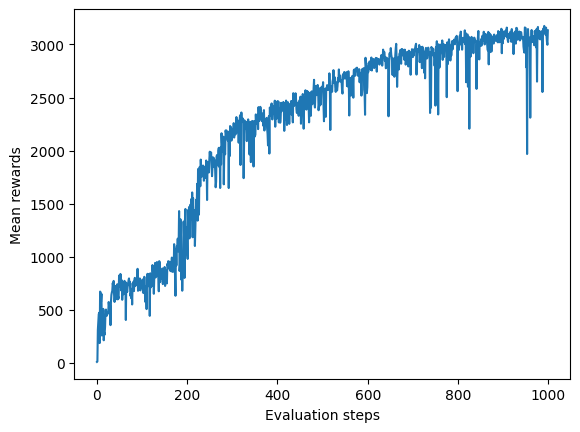

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards)), rewards)
plt.ylabel('Mean rewards')
plt.xlabel('Evaluation steps')
plt.show()

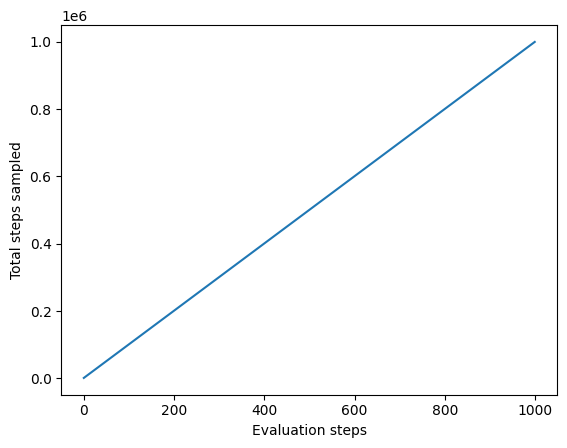

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(steps)), steps)
plt.ylabel('Total steps sampled')
plt.xlabel('Evaluation steps')
plt.show()

In [8]:
def show_video(env_name, tag='best'):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = f'video/{env_name}_{tag}.mp4'
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data=''''''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")
        
def show_video_of_model(agent, env_name, tag='best'):
    env = gym.make(env_name)
    vid = video_recorder.VideoRecorder(env, path=f"video/{env_name}_{tag}.mp4")
    agent.load_state_dict(torch.load(f'checkpoint_{tag}.pth'))
    state = env.reset()
    done = False
    while not done:
        frame = env.render()
        vid.capture_frame()
        action = agent.act(state)

        state, reward, done, _ = env.step(action)        
    env.close()

In [22]:
class Agent(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28, 256),
            nn.ELU(),
            nn.Linear(256, 256),
            nn.ELU(),
            nn.Linear(256, 8),
            nn.Tanh()
        )
        self.load_state_dict(torch.load("agent.pkl"))
        self.model.eval()
        
    def act(self, state):
        with torch.no_grad():
            state = torch.tensor(np.array(state)).float()
            action = self.model(state)
            return action.cpu().numpy()

    def reset(self):
        pass

In [24]:
agent = Agent()
show_video_of_model(agent, ENV_NAME,'first')

In [25]:
show_video(ENV_NAME,'first')

In [27]:
agent = Agent()
show_video_of_model(agent, ENV_NAME,'best')

In [28]:
show_video(ENV_NAME,'best')

In [32]:
def evaluate_policy(env, agent, episodes=5):
    returns = []
    for _ in range(episodes):
        done = False
        state = env.reset()
        total_reward = 0.
        
        while not done:
            state, reward, done, _ = env.step(agent.act(state))
            total_reward += reward
        returns.append(total_reward)
    return returns

In [33]:
env = make(ENV_NAME)
(env.observation_space.shape[0],env.action_space.shape[0])

(28, 8)

In [34]:
env = make(ENV_NAME)
td3 = t.TD3(state_dim=env.observation_space.shape[0], action_dim=env.action_space.shape[0])
td3.actor.load_state_dict(torch.load("agent.pkl"))
returns_check = evaluate_policy(env, td3, episodes=50)

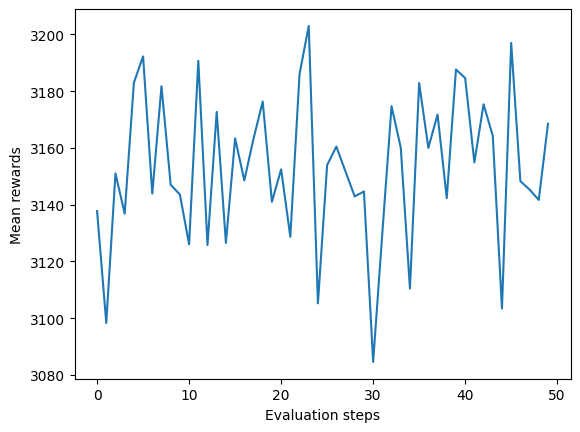

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(returns_check)), returns_check)
plt.ylabel('Mean rewards')
plt.xlabel('Evaluation steps')
plt.show()

In [36]:
print(f'Mean rewards by 50 episodes: {np.mean(returns_check)}')

Mean rewards by 50 episodes: 3153.3535918700222
